### О ЛР:

- Coding Gradient boosting

----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку (Она тут равняется 6).

**Оценка**: 6

***DeadLine - 28.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.

In [5]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style="darkgrid")
filterwarnings("ignore")

In [6]:
x = load_npz("x.npz")
y = np.load("y.npy")

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 666 для воспроизводимости).

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=666
)

x_test, x_valid, y_test, y_valid = train_test_split(
    x_test, y_test, test_size=0.5, random_state=666
)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга [2 балла]

Необходимо дописать код в файле `boosting.py`. Уже создан шаблон класса `Boosting`, который можно модифицировать по своему усмотрению.

### Описание функций:

#### `__init__`

Конструктор класса принимает следующие параметры:

- `base_model_class` — класс базовой модели для бустинга.
- `base_model_params` — словарь гиперпараметров для базовой модели.
- `n_estimators` — количество базовых моделей для обучения.
- `learning_rate` — темп обучения, должен быть в диапазоне (0, 1].
- `subsample` — доля обучающей выборки для тренировки базовой модели (размер бутстрап-выборки относительно исходной).
- `early_stopping_rounds` — число итераций без улучшения на валидационной выборке, после которых обучение прекращается.
- `plot` — флаг для построения графика качества моделей после обучения.

#### `fit`

Метод `fit` принимает обучающую и валидационную выборки.

1. Инициализируем нулевую модель и делаем предсказания (например, все нули) для обеих выборок.
2. Обучаем `n_estimators` базовых моделей:
   - Обучаем новую базовую модель на текущих остатках.
   - Обновляем предсказания на обучающей и валидационной выборках.
   - Рассчитываем ошибки на обеих выборках с помощью `loss_fn`.
   - Проверяем условия для ранней остановки.

3. Если флаг `plot` установлен, строим график качества после обучения всех моделей.

#### `fit_new_base_model`

Метод `fit_new_base_model` принимает обучающую выборку и текущие предсказания для неё.

1. Генерируем бутстрап-выборку.
2. Обучаем базовую модель на этой выборке.
3. Оптимизируем значение гаммы.
4. Добавляем новую базовую модель и гамму в соответствующие списки (учитывая `learning_rate`).

#### `predict_proba`

Метод `predict_proba` принимает выборку для предсказания вероятностей.

1. Суммируем предсказания базовых моделей (учитывая гамму и `learning_rate`).
2. Применяем сигмоидальную функцию для получения вероятностей.

In [8]:
%load_ext autoreload

In [12]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [8]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) <= boosting.n_estimators
assert len(boosting.gammas) <= boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 910 ms, sys: 320 µs, total: 910 ms
Wall time: 912 ms
Train ROC-AUC 0.9872
Valid ROC-AUC 0.9420
Test ROC-AUC 0.9437


## Задание 2. Обучение градиентного бустинга [0.5 балла]

Оцените качество вашей реализации градиентного бустинга на тестовой выборке, используя базовые модели — решающие деревья с различной максимальной глубиной. Метрикой будет ROC-AUC.

**Инструкция:**
1. Перебирайте значения максимальной глубины деревьев от 1 до 30 с шагом 2.
2. Оставьте остальные параметры бустинга по умолчанию.
3. Постройте график зависимости качества на обучающей и тестовой выборке от максимальной глубины деревьев.

Depth: 1, Train ROC-AUC: 0.8471, Test ROC-AUC: 0.8495
Depth: 3, Train ROC-AUC: 0.9355, Test ROC-AUC: 0.9323
Depth: 5, Train ROC-AUC: 0.9524, Test ROC-AUC: 0.9457
Depth: 7, Train ROC-AUC: 0.9625, Test ROC-AUC: 0.9537
Depth: 9, Train ROC-AUC: 0.9698, Test ROC-AUC: 0.9565
Depth: 11, Train ROC-AUC: 0.9755, Test ROC-AUC: 0.9555
Depth: 13, Train ROC-AUC: 0.9784, Test ROC-AUC: 0.9527
Depth: 15, Train ROC-AUC: 0.9821, Test ROC-AUC: 0.9505
Depth: 17, Train ROC-AUC: 0.9838, Test ROC-AUC: 0.9506
Depth: 19, Train ROC-AUC: 0.9849, Test ROC-AUC: 0.9480
Depth: 21, Train ROC-AUC: 0.9859, Test ROC-AUC: 0.9491
Depth: 23, Train ROC-AUC: 0.9868, Test ROC-AUC: 0.9515
Depth: 25, Train ROC-AUC: 0.9861, Test ROC-AUC: 0.9428
Depth: 27, Train ROC-AUC: 0.9869, Test ROC-AUC: 0.9496
Depth: 29, Train ROC-AUC: 0.9865, Test ROC-AUC: 0.9445


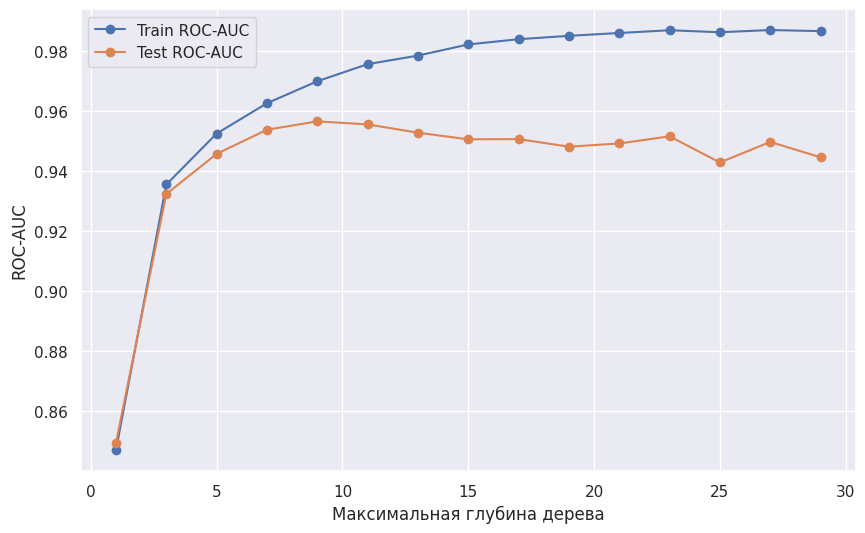

In [11]:
results = {}

depths = range(1, 30, 2)

train_scores = []
test_scores = []

for depth in depths:
    boosting = Boosting(base_model_params={'max_depth': depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    train_score = boosting.score(x_train, y_train)
    test_score = boosting.score(x_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"Depth: {depth}, Train ROC-AUC: {train_score:.4f}, Test ROC-AUC: {test_score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Train ROC-AUC', marker='o')
plt.plot(depths, test_scores, label='Test ROC-AUC', marker='o')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('ROC-AUC')
plt.legend()
plt.grid(True)
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

***Лучший результат имеет модель с глубиной в 9 на тестовой выборке, судя по всему именна это та глубина, на которой дерево улавливает все признаки и при этом не переобучается на данных, что видно на более высокой глубине, где точность на тестовой выборке падает, при том что на тренировочной продолжается рост***

## Задание 3. Подбор гиперпараметров и поиск оптимальной модели [3 балла]

Настройте основные гиперпараметры вашей модели градиентного бустинга, используя валидационную выборку. Подберите параметры как для самого бустинга, так и для базовых моделей.

**Рекомендации:**
- Используйте библиотеки для автоматизированного подбора гиперпараметров, такие как [Hyperopt](https://github.com/hyperopt/hyperopt) или [Optuna](https://optuna.org/).
- Подберите все основные параметры, чтобы найти лучшую модель на валидационной выборке.

In [14]:
# !pip install optuna

import optuna
from sklearn.model_selection import train_test_split

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 30)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
    subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
    
    boosting = Boosting(
        base_model_params={'max_depth': max_depth},
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample,
        early_stopping_rounds=10
    )
    
    boosting.fit(x_train, y_train, x_valid, y_valid)
    
    valid_score = boosting.score(x_valid, y_valid)
    return valid_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
print("Best validation score:", study.best_value)

best_params = study.best_params
boosting = Boosting(
    base_model_params={'max_depth': best_params['max_depth']},
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    early_stopping_rounds=10
)
boosting.fit(x_train, y_train, x_valid, y_valid)

print(f'Test ROC-AUC: {boosting.score(x_test, y_test):.4f}')

[I 2024-06-11 00:09:35,437] A new study created in memory with name: no-name-f7746333-1c8e-4348-b4f2-9cb0e47ec10b


[I 2024-06-11 00:09:40,970] Trial 0 finished with value: 0.9416362589555 and parameters: {'max_depth': 4, 'n_estimators': 181, 'learning_rate': 0.00046009000819778774, 'subsample': 0.7317866243521949}. Best is trial 0 with value: 0.9416362589555.
[I 2024-06-11 00:09:45,633] Trial 1 finished with value: 0.9466135913889938 and parameters: {'max_depth': 4, 'n_estimators': 145, 'learning_rate': 0.021670267378053783, 'subsample': 0.7740072499328343}. Best is trial 1 with value: 0.9466135913889938.
[I 2024-06-11 00:10:03,606] Trial 2 finished with value: 0.955284078560562 and parameters: {'max_depth': 25, 'n_estimators': 75, 'learning_rate': 0.0003647965734109451, 'subsample': 0.831670883576265}. Best is trial 2 with value: 0.955284078560562.
[I 2024-06-11 00:10:19,095] Trial 3 finished with value: 0.9555227647949243 and parameters: {'max_depth': 21, 'n_estimators': 68, 'learning_rate': 0.0011718413942573293, 'subsample': 0.9130236243675466}. Best is trial 3 with value: 0.9555227647949243.
[

Best parameters: {'max_depth': 12, 'n_estimators': 194, 'learning_rate': 0.00016119632784090637, 'subsample': 0.5744317281205181}
Best validation score: 0.9629777060956498
Test ROC-AUC: 0.9606


## Задание 4. Интерпретация градиентного бустинга [1 балл]

Постройте калибровочную кривую для вашей лучшей модели градиентного бустинга и оцените, насколько точно модель предсказывает вероятности.

**Инструкция:**
1. Постройте калибровочную кривую для лучшей модели градиентного бустинга.
2. Постройте аналогичную кривую для логистической регрессии.
3. Сравните полученные результаты и проанализируйте, насколько хорошо каждая модель оценивает вероятности.

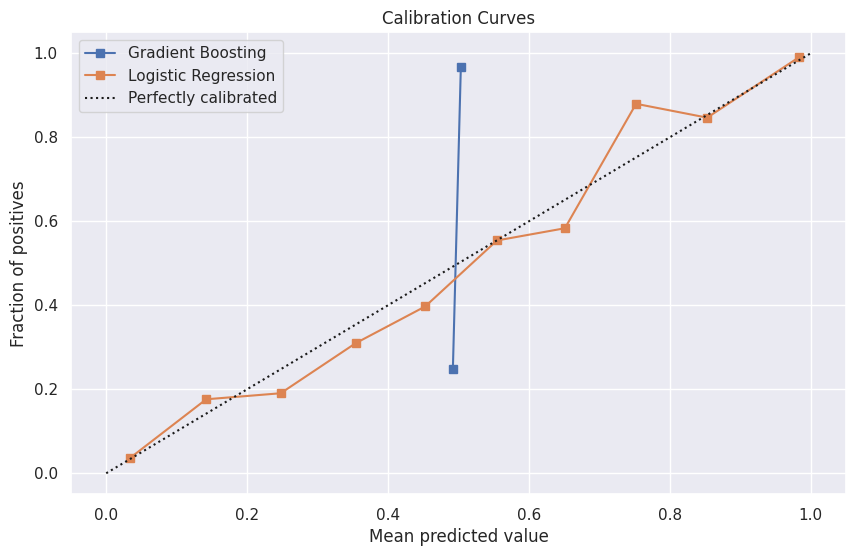

Gradient Boosting ROC-AUC: 0.9604
Logistic Regression ROC-AUC: 0.9623


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score

best_boosting = Boosting(
    base_model_params={'max_depth': 12},
    n_estimators=194,
    learning_rate=0.00016119632784090637,
    subsample=0.5744317281205181,
    early_stopping_rounds=10
)
best_boosting.fit(x_train, y_train, x_valid, y_valid)

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)

boosting_probs = best_boosting.predict_proba(x_test)[:, 1]
logistic_probs = logistic_regression.predict_proba(x_test)[:, 1]

boosting_fraction_of_positives, boosting_mean_predicted_value = calibration_curve(y_test, boosting_probs, n_bins=10)

logistic_fraction_of_positives, logistic_mean_predicted_value = calibration_curve(y_test, logistic_probs, n_bins=10)

plt.figure(figsize=(10, 6))
plt.plot(boosting_mean_predicted_value, boosting_fraction_of_positives, "s-", label="Gradient Boosting")
plt.plot(logistic_mean_predicted_value, logistic_fraction_of_positives, "s-", label="Logistic Regression")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.title("Calibration Curves")
plt.legend()
plt.grid(True)
plt.show()

boosting_roc_auc = roc_auc_score(y_test, boosting_probs)
logistic_roc_auc = roc_auc_score(y_test, logistic_probs)

print(f'Gradient Boosting ROC-AUC: {boosting_roc_auc:.4f}')
print(f'Logistic Regression ROC-AUC: {logistic_roc_auc:.4f}')

Теперь оценим важность признаков для градиентного бустинга.

**Задание:**
1. Поскольку базовая модель — дерево из `sklearn`, вычислите важность каждого признака для каждого дерева, используя атрибут `feature_importances_` у `DecisionTreeRegressor`.
2. Усредните значения важности по всем деревьям и нормализуйте их так, чтобы сумма была равна единице (убедитесь, что значения неотрицательны).
3. Дополните вашу реализацию бустинга, добавив метод `feature_importances_`, который будет возвращать усредненные и нормализованные важности признаков.

**Построение графиков:**
1. Постройте столбчатую диаграмму важности признаков для градиентного бустинга.
2. На соседнем графике изобразите важность признаков для логистической регрессии, используя модули весов.
3. Сравните графики и проанализируйте полученные результаты.

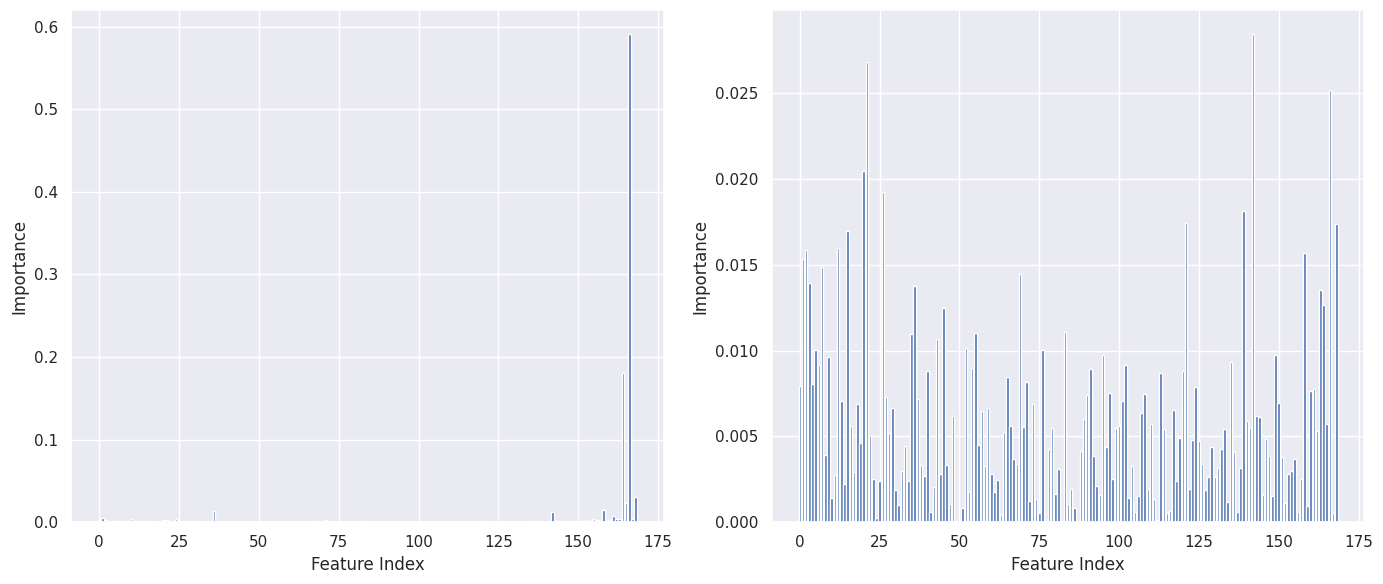

In [29]:
import matplotlib.pyplot as plt

boosting_feature_importances = best_boosting.feature_importances_

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)
logistic_feature_importances = np.abs(logistic_regression.coef_[0])

logistic_feature_importances /= logistic_feature_importances.sum()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(range(len(boosting_feature_importances)), boosting_feature_importances)
ax[0].set_xlabel("Feature Index")
ax[0].set_ylabel("Importance")

ax[1].bar(range(len(logistic_feature_importances)), logistic_feature_importances)
ax[1].set_xlabel("Feature Index")
ax[1].set_ylabel("Importance")

plt.tight_layout()
plt.show()

Обычно избыточные признаки могут негативно влиять на качество бустинга. Попробуйте следующее:

1. **Отфильтруйте неважные признаки:** Используйте построенную диаграмму важности признаков, чтобы отобрать наиболее незначительные признаки.
2. **Обучите модель повторно:** Обучите модель на основе оставшихся признаков с теми же гиперпараметрами.
3. **Оцените качество модели:** Сравните результаты новой модели с исходной. Улучшилось ли качество после отфильтровывания незначительных признаков?

Filtered Boosting ROC-AUC: 0.9607
Original Boosting ROC-AUC: 0.9601


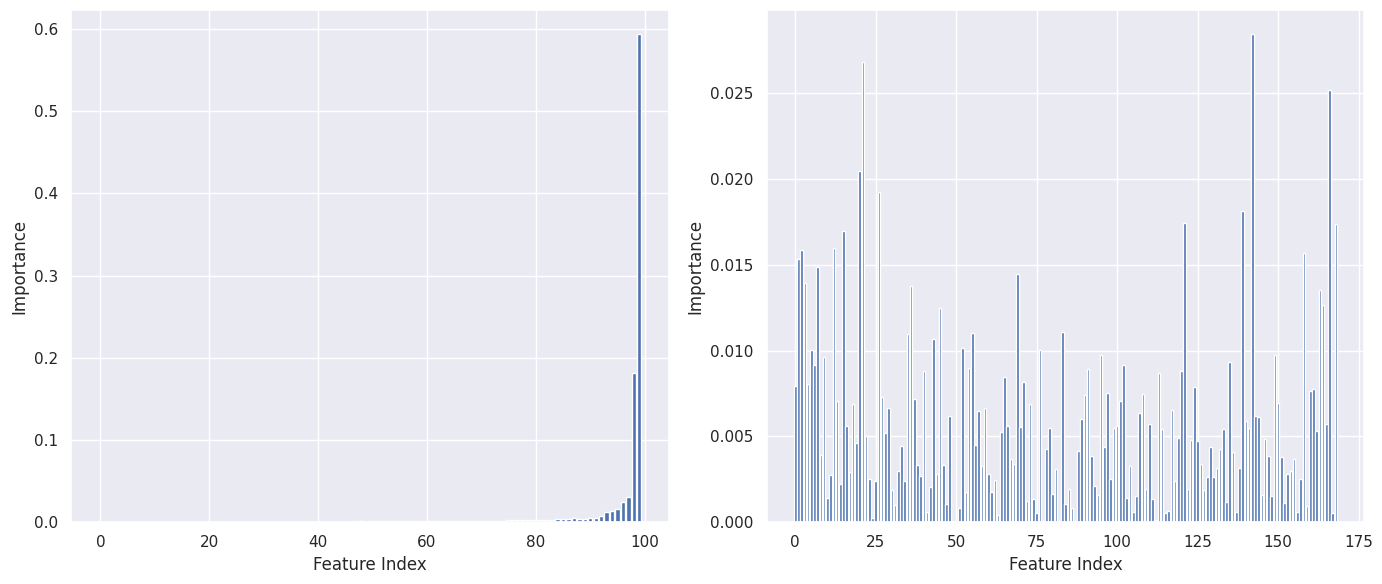

In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

num_features_to_select = 100

best_boosting = Boosting(
    base_model_params={'max_depth': 12},
    n_estimators=194,
    learning_rate=0.00016119632784090637,
    subsample=0.5744317281205181,
    early_stopping_rounds=10
)
best_boosting.fit(x_train, y_train, x_valid, y_valid)

boosting_feature_importances = best_boosting.feature_importances_

# сортирую и выбираю лучшие 100 признаков
top_features = np.argsort(boosting_feature_importances)[-num_features_to_select:]

x_train_filtered = x_train[:, top_features]
x_valid_filtered = x_valid[:, top_features]
x_test_filtered = x_test[:, top_features]

filtered_boosting = Boosting(
    base_model_params={'max_depth': 12},
    n_estimators=194,
    learning_rate=0.00016119632784090637,
    subsample=0.5744317281205181,
    early_stopping_rounds=10
)
filtered_boosting.fit(x_train_filtered, y_train, x_valid_filtered, y_valid)

filtered_test_roc_auc = filtered_boosting.score(x_test_filtered, y_test)
print(f'Filtered Boosting ROC-AUC: {filtered_test_roc_auc:.4f}')

original_test_roc_auc = best_boosting.score(x_test, y_test)
print(f'Original Boosting ROC-AUC: {original_test_roc_auc:.4f}')

filtered_boosting_feature_importances = filtered_boosting.feature_importances_

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(range(len(filtered_boosting_feature_importances)), filtered_boosting_feature_importances)
ax[0].set_xlabel("Feature Index")
ax[0].set_ylabel("Importance")

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)
logistic_feature_importances = np.abs(logistic_regression.coef_[0])
logistic_feature_importances /= logistic_feature_importances.sum()
ax[1].bar(range(len(logistic_feature_importances)), logistic_feature_importances)
ax[1].set_xlabel("Feature Index")
ax[1].set_ylabel("Importance")

plt.tight_layout()
plt.show()

***Качество стало лучше, но незначительно, может быть можно поднять точность ещё выше, но тут нужно больше экспериментов***

## Задание 5 (бонус). Блендинговое [0.5 балла]

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [34]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

best_boosting = Boosting(
    base_model_params={'max_depth': 12},
    n_estimators=194,
    learning_rate=0.00016119632784090637,
    subsample=0.5744317281205181,
    early_stopping_rounds=10
)
best_boosting.fit(x_train, y_train, x_valid, y_valid)

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train, y_train)

boosting_probs = best_boosting.predict_proba(x_test)[:, 1]
logistic_probs = logistic_regression.predict_proba(x_test)[:, 1]
blended_probs = (boosting_probs + logistic_probs) / 2
blended_roc_auc = roc_auc_score(y_test, blended_probs)
print(f'Blending ROC-AUC: {blended_roc_auc:.4f}')

boosting_roc_auc = roc_auc_score(y_test, boosting_probs)
logistic_roc_auc = roc_auc_score(y_test, logistic_probs)

print(f'Gradient Boosting ROC-AUC: {boosting_roc_auc:.4f}')
print(f'Logistic Regression ROC-AUC: {logistic_roc_auc:.4f}')

Blending ROC-AUC: 0.9625
Gradient Boosting ROC-AUC: 0.9601
Logistic Regression ROC-AUC: 0.9623


## Задание 6 (бонус). Катбустовое [0.5 балла]

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [36]:
# !pip install catboost

from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

catboost_model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=10, verbose=0)
catboost_model.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=10)
catboost_probs = catboost_model.predict_proba(x_test)[:, 1]

catboost_roc_auc = roc_auc_score(y_test, catboost_probs)
print(f'CatBoost ROC-AUC: {catboost_roc_auc:.4f}')

best_boosting_probs = best_boosting.predict_proba(x_test)[:, 1]
best_boosting_roc_auc = roc_auc_score(y_test, best_boosting_probs)
print(f'Gradient Boosting ROC-AUC: {best_boosting_roc_auc:.4f}')

CatBoost ROC-AUC: 0.9673
Gradient Boosting ROC-AUC: 0.9601


***Так, ну CatBoost лучше, чем мой бустинг на 0.7 от процента. Я считаю, что Yandex не так уж и крут, раз у меня получилось отстать меньше, чем на процент:)***

Оставьте пожалуйста отзыв о курсе!

https://forms.gle/LajA3Xrps6u96Q5A8


Это очень важно. Благодаря обратной связи мы будем двигаться в сторону антиградиента)


***Отзыв оставил одним из первых, надеюсь на плюсик в карму и хорошую оценку на экзамене***